In [1]:
#Here it starts, the heroic path of data hygiene. 

#Might be interesting to check who reports the shark attacks and when, so we could wonder where is the void in reports.
#The data may show that sharks only attack on english spoken territory.
#If data is accurate enough, it could be funny to search at what time does sharks set their tables.
#Might more attacks could be reported a couple years after Jaws was premiered? 1975 is the year.

#SEEMINGLY RELEVANT COLUMNS:
#Tier1: Country, Date, Time, Year 
#Tier2: Name, Area, Location, Activity

#Crucial facts:
#-In 2008 a polar bear jaw was found in a Greenland shark's stomach.
#-This is Mary Lee, the influencer shark: https://twitter.com/maryleeshark

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

#Hokusai level shark graphics.
import pylab as plt
import seaborn as sns

#This make the graph possible
%matplotlib inline

#Functions
from src.funk import Funk 

In [3]:
#Load fishy data from attacks.csv

tibu = pd.read_csv('attacks.csv', encoding= "ISO-8859-1")

In [4]:
tear1 = tibu[['Date', 'Year', 'Country','Time']]
tear2 = tibu[['Name', 'Area', 'Location', 'Activity']]
tears = tibu[['Date', 'Year', 'Country','Time', 'Name', 'Area', 'Location', 'Activity']]

In [5]:
# Null values in columns. Remember that the important ones are as follow:
#Tier1: Country, Date, Time, Year 
#Tier2: Name, Area, Location, Activity
#Originally, the file has 25723 rows

#Irrelevant, as it comes, this file is mainly null values. Let's check it by row. But let's drop duplicates first.

'N nan cols: 10'

Year                       0.037965
Type                       0.056948
Activity                   7.574032
Age                       36.958998
Injury                     0.322703
Fatal (Y/N)                8.067578
Time                      46.848899
Species                   39.445710
Investigator or Source     0.265756
href formula               0.018983
dtype: float64

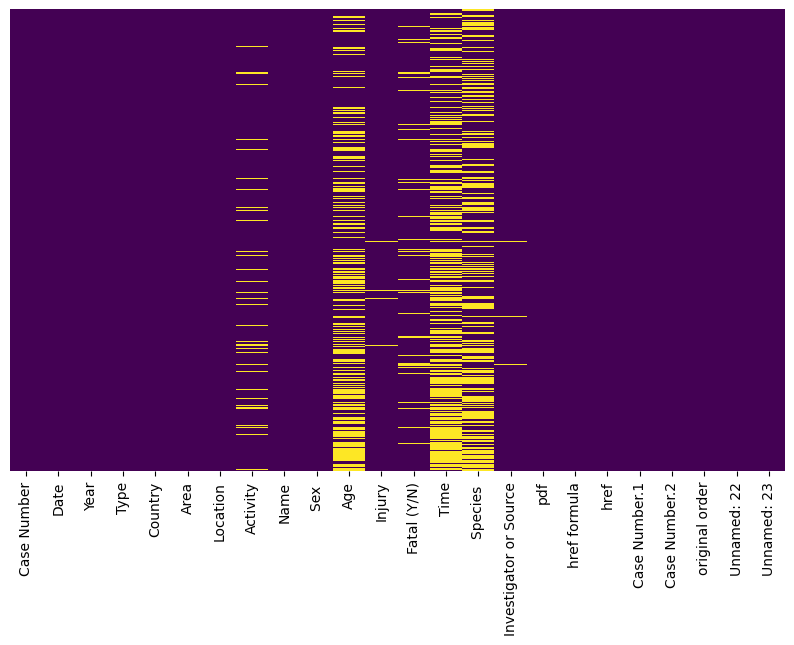

In [23]:
Funk.check_nan(tibu)

In [7]:
#Dropping all rows where Tear1 columns are null. Before (6312, 24), then (6302, 24)
tibu.drop(tibu[(tibu.Country.isna() == 1) & (tibu.Date.isna() == 1) 
                                           & (tibu.Time.isna() == 1)
                                           & (tibu.Year.isna() == 1)].index, axis=0, inplace=True)

In [8]:
#HYGIENE NEXT STEPS:

#Clean fully the Year column
#Clean the Country column, if empty fill it with Area if not with Location. Unknown for null Area and Location.
#Name and Sex will be unknown
#Unnamed columns will be filled with seawater

In [9]:
butwhere = tibu[(tibu.Country.isna() == 1) & (tibu.Area.isna() == 1) & (tibu.Location.isna() == 1)]
tibu.drop(butwhere.index, axis=0, inplace=True)

In [10]:
deceroa1918 = tibu[(tibu.Year >= 0) & (tibu.Year < 1918)]

#There are 125 rows in year 0
#There are 44 row from 0 to 1800
#Since the oldest dated records seem to be less precise, I'll analyse only the last hundred years.

tibu.drop(deceroa1918.index, axis=0, inplace=True)

In [11]:
#Year seems balanced now.

stats = tibu.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
Year,5268.0,1982.526006,27.727167,1918.0,1960.00,1990.0,2007.00,2018.0,47.0
original order,5270.0,3663.910436,1525.011325,224.0,2343.25,3666.5,4983.75,6303.0,2640.5


In [12]:
#GEOCLEAN
#Florida and its Volusia County is the most frequent attack place, worth filling some null values with it.
flo = tibu[((tibu.Area.isna() == 1)) & tibu.Location.str.contains('Florida')].head()
flo.Area = 'Florida'

In [13]:
#Aside from Florida, the rest of null values are too disperse to find a rule without geolocation. 
#tibu[(tibu.Country.isna() == 1)]['Area'].value_counts().head(39)
#tibu[(tibu.Area.isna() == 1)]['Location'].value_counts().head(39)

In [14]:
#The null values for both COuntry and Area are so few that this can be dropped. 
where = tibu[(tibu.Country.isna() == 1) & (tibu.Area.isna() == 1)]
tibu.drop(where.index, axis=0, inplace=True)

#Location and Area are too difficult to locate with the rest of the values, so they will be set Unknown.

tibu['Location'].fillna('Unknown', inplace=True)
tibu['Area'].fillna('Unknown', inplace=True)

In [15]:
#Country nulls at this point represent international waters, so they will be set as Unknown too, 
#just for not creating another category, cause the previous unknown could very well be international waters too.
bad_index = tibu.Country[tibu.Country.isna()].index
tibu.iloc[bad_index]
tibu['Country'].fillna('Unknown', inplace=True)

In [16]:
#Wide is the sea.
tibu['Unnamed: 22'].fillna('Seawater', inplace=True)
tibu['Unnamed: 23'].fillna('Seawater', inplace=True)
tibu['Name'].fillna('Unknown', inplace=True)
tibu['Sex '].fillna('Unknown', inplace=True)

In [19]:
#Originally, the dataframe had (25723, 24) rows, after dropping duplicates and old records it has (5268, 24).
#Originally, the dataframe used 22.8MB, after dropping duplicates and changing datatype it uses 6.4MB.
tibu = tibu.drop_duplicates()
for c in tibu.select_dtypes('object'):
    
    tibu[c]=tibu[c].astype('category')
    
for c in tibu.select_dtypes('float'):
    
    tibu[c]=pd.to_numeric(tibu[c], downcast='float')

In [20]:
tibu.reset_index(drop=True, inplace=True)

In [21]:
tibu.to_csv('mar_de_caca.csv', index=False)

In [22]:
tibu.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Case Number             5268 non-null   category
 1   Date                    5268 non-null   category
 2   Year                    5266 non-null   float32 
 3   Type                    5265 non-null   category
 4   Country                 5268 non-null   category
 5   Area                    5268 non-null   category
 6   Location                5268 non-null   category
 7   Activity                4869 non-null   category
 8   Name                    5268 non-null   category
 9   Sex                     5268 non-null   category
 10  Age                     3321 non-null   category
 11  Injury                  5251 non-null   category
 12  Fatal (Y/N)             4843 non-null   category
 13  Time                    2800 non-null   category
 14  Species                 